In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import urllib.request
from pathlib import Path

In [2]:
def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://homl.info/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as tarball_file:
            tarball_file.extractall(path="datasets")
    return pd.read_csv(Path("datasets/titanic/train.csv"))

In [3]:
titanic_data = load_titanic_data()

In [12]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_labels = titanic_data["Survived"].copy()

In [89]:
train_set = titanic_data.drop("Survived", axis=1)

In [11]:
train_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train_labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

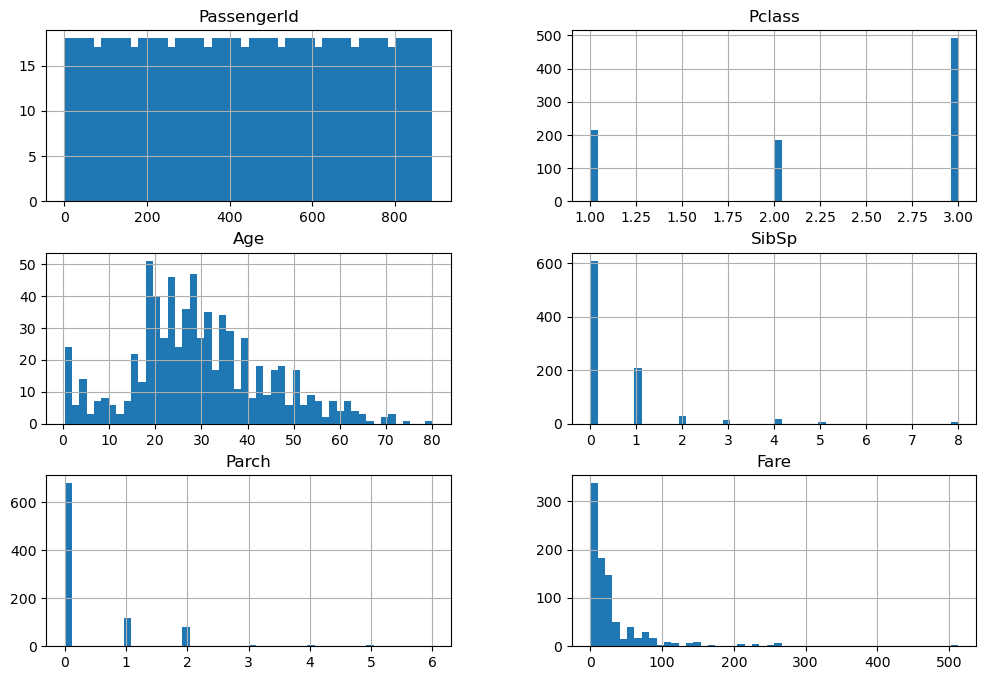

In [15]:
train_set.hist(bins=50, figsize=(12, 8))
plt.show()

In [16]:
train_set["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [17]:
train_set["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [18]:
train_set["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
train_set["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [20]:
train_set["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [90]:
train_set = train_set.drop(columns=['PassengerId', 'Cabin'])

In [22]:
train_set.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


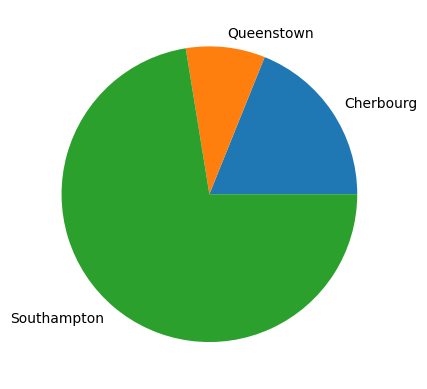

In [46]:
Cherbourg, Queenstown, Southampton = (train_set["Embarked"] == "C").sum(), (train_set["Embarked"] == "Q").sum(), (train_set["Embarked"] == "S").sum()
data = [Cherbourg, Queenstown, Southampton]
embarked = ["Cherbourg", "Queenstown", "Southampton"]
plt.pie(data, labels=embarked);

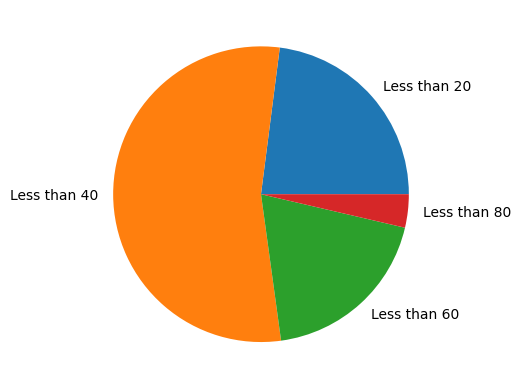

In [59]:
one, two, three, four = 0, 0, 0, 0
for age in train_set["Age"]:
    if age > 0 and age < 20:
        one += 1
    elif age >= 20 and age < 40:
        two += 1
    elif age >= 40 and age < 60:
        three += 1
    elif age >= 60 and age <= 80:
        four += 1
age_groups = ["Less than 20", "Less than 40", "Less than 60", "Less than 80"]
data = [one, two, three, four]
plt.pie(data, labels=age_groups);

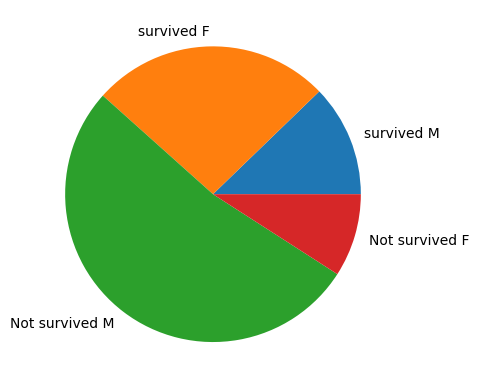

In [86]:
male_count, female_count, male, female = 109, 233, 468, 81
labels = ["survived M", "survived F", "Not survived M", "Not survived F"]
data = [male_count, female_count, male, female]
plt.pie(data, labels=labels);